In [59]:
# Import all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [60]:
# Reset pseudo random number generator so that the results are reproducible.
seed = 42
np.random.seed(seed)

In [61]:
# Sets the number of examples.
N = 1000

# Attribute.
x1 = np.random.rand(N, 1)
x2 = 2*np.random.rand(N, 1)
x3 = 3*np.random.rand(N, 1)

# Target function.
y = 1.0 + x1 + x2 + x3 + x1**2 + x1*x2 + x1*x3 + x2**2 + x2*x3 + x3**2

# Noisy function.
y_noisy = y + np.random.randn(N, 1)

In [62]:
X = np.c_[x1, x2, x3]

X_train, X_val, y_train, y_val = train_test_split(X, y_noisy, test_size=0.2, random_state=seed)

In [63]:
# Regularization factor.
lambdas = [1]

# Polynomial order.
model_order = 2

In [64]:
include_bias = True

# Plot original data versus noisy version.
for i in range(0, len(lambdas)):

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], random_state=seed) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(X_train, y_train)
    # Print coefs
    print(model.named_steps['poly'].powers_)
    print('Lambda: %1.4e:' % (lambdas[i]))
    print(model.named_steps['reg'].intercept_)
    print(model.named_steps['reg'].coef_)
    print('---------------------------------------------')
    # Predict.
    y_test_regul = model.predict(X_val)

[[0 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [2 0 0]
 [1 1 0]
 [1 0 1]
 [0 2 0]
 [0 1 1]
 [0 0 2]]
Lambda: 1.0000e+00:
[11.70190957]
[0.         0.         0.         0.         0.         0.16731659
 0.88463521 0.         3.00193405 1.38473182]
---------------------------------------------


Text(0.5, 1.0, 'Feature importance using Lasso')

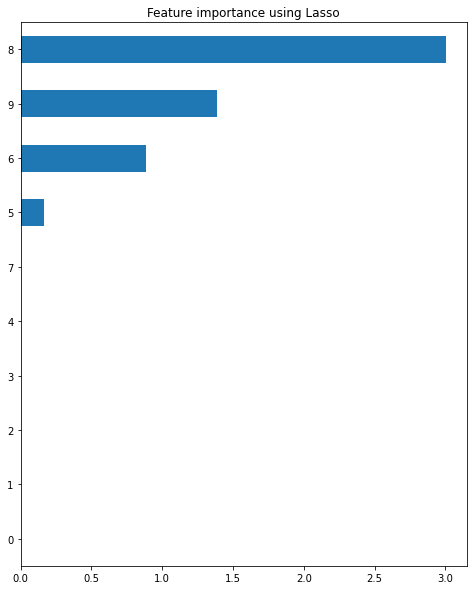

In [65]:
coef = pd.Series(model.named_steps['reg'].coef_)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso")